# Importation des bibliothèques

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importation des données

In [36]:
data=pd.read_csv("./static/data/data.csv")
data.head(4)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450


# Exploration et nettoyage des données

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [38]:
data.shape

(11914, 16)

In [39]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


On supprime les lignes ou le prix est nul puisque c'est la variable réponse à étudier.

In [40]:
data.drop(data[data['MSRP'] == 0].index, inplace=True)
data.shape

(11914, 16)

On supprime la colonne ```Market Category``` car non utile dans la prédiction du prix des véhicules.

In [41]:
data.drop(['Market Category'], axis=1, inplace=True)
data.shape

(11914, 15)

On cherche les duplicatas et on supprime les observations associées.

In [43]:
data.duplicated().sum()

720

In [45]:
data.drop_duplicates(keep=False,inplace=True)
data.shape

(10573, 15)

On cherche les valeurs nulles et on supprimes les observations associées.

In [46]:
data.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [50]:
data.dropna(inplace=True,axis=0)
data.shape

(10471, 15)

# EDA et visualisation des données

<AxesSubplot:>

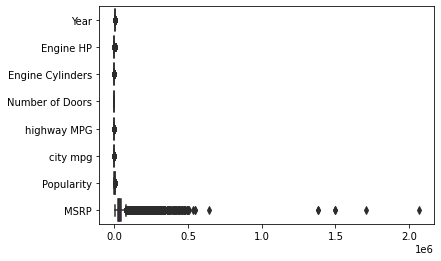

In [51]:
sns.boxplot(data=data,orient='h',palette='flare')

On va considérer les véhicules ayant un prix supérieur à 500 000€ comme étant des individus à valeur abérrante. Pour traiter ces valeurs, on supprime les individus.

In [53]:
data.drop(data[data['MSRP'] >= 500000].index,inplace=True)
data.shape

(10460, 15)

<AxesSubplot:xlabel='MSRP'>

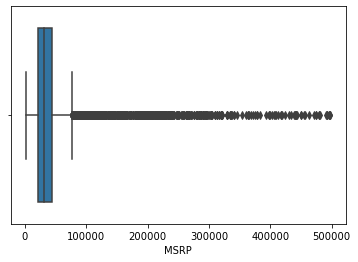

In [55]:
sns.boxplot(x=data['MSRP'])

<AxesSubplot:xlabel='Engine Cylinders'>

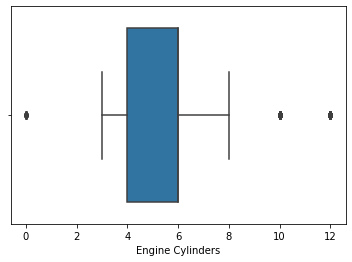

In [57]:
sns.boxplot(x=data['Engine Cylinders'])

<AxesSubplot:xlabel='Engine HP'>

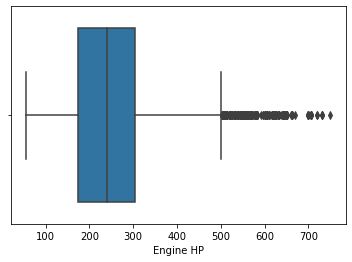

In [58]:
sns.boxplot(x=data['Engine HP'])

On calcule l'écart interquartile afin de définir des valeurs extrêmes pour chaque variable. On supprime ensuite les observations dont les variables possèdent des valeurs extrêmes.

In [59]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                    9.00
Engine HP             130.00
Engine Cylinders        2.00
Number of Doors         2.00
highway MPG             8.00
city mpg                7.00
Popularity           1460.00
MSRP                21793.75
dtype: float64


In [60]:
data = data[~((data < (Q1 - 1.5*IQR))|(data > (Q3 + 1.5*IQR))).any(axis = 1)]
data.shape

(8206, 15)

### Matrice de corrélation
On utilise la matrice de corrélation afin de quantifier l'association entre les variables d'un dataset.

In [61]:
data.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.329436,-0.085893,0.252665,0.357791,0.319703,0.208960,0.579748
Engine HP,0.329436,1.000000,0.745334,0.029354,-0.464676,-0.564127,0.099933,0.746902
Engine Cylinders,-0.085893,0.745334,1.000000,0.009748,-0.690873,-0.744101,0.019223,0.405415
Number of Doors,0.252665,0.029354,0.009748,1.000000,0.017419,0.039197,-0.080140,0.125588
highway MPG,0.357791,-0.464676,-0.690873,0.017419,1.000000,0.937108,0.095272,-0.134604
city mpg,0.319703,-0.564127,-0.744101,0.039197,0.937108,1.000000,0.084375,-0.211287
Popularity,0.208960,0.099933,0.019223,-0.080140,0.095272,0.084375,1.000000,0.115109
MSRP,0.579748,0.746902,0.405415,0.125588,-0.134604,-0.211287,0.115109,1.000000


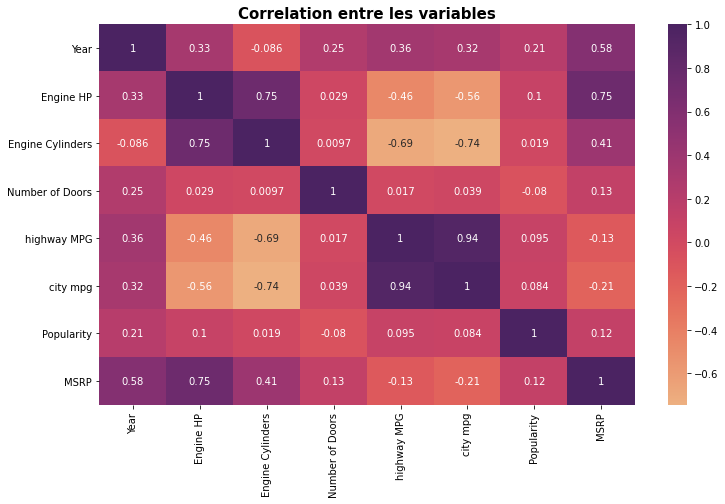

In [64]:
data_corr=data.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(data_corr,cmap='flare',annot=True)
plt.title("Correlation entre les variables",weight='bold',fontsize=15)
plt.show()

D'après la heatmap on peut conclure que :
- Le prix est positivement corrélé avec l'année de sortie du véhicule et avec la puissance en chevaux.
- La puissance en chevaux et le nombre de cylindres sont fortement corrélés positivement entre eux.
    <br/>Si le nombre de cylindres augmente, la puissance en chevaux augmente.
- Les variables MPG Higway et MPG City sont corrélées négativement avec le nombre de cyclindres.
    <br/>Si le nombre de cylindres augmente, la consommation du véhicule sur l'autoroute et en ville diminue.
    

Pour Les prochaines visualisations et afin de simplifier la lecture, les valeurs de prix seront regroupées en catégories.

In [65]:
#creating new column 'Price Range' for easy visualization
def getrange(Price):
    if (Price >= 0 and Price < 25000):
        return '0 - 25000'
    if (Price >= 25000 and Price < 50000):
        return '25000 - 50000'
    if (Price >= 50000 and Price < 75000):
        return '50000 - 75000'
    if (Price >= 75000 and Price < 100000):
        return '75000 - 100000'
       
data['Price Range'] = data.apply(lambda x:getrange(x['MSRP']),axis = 1)

data['Price Range'].value_counts()

25000 - 50000     4460
0 - 25000         2827
50000 - 75000      895
75000 - 100000      24
Name: Price Range, dtype: int64

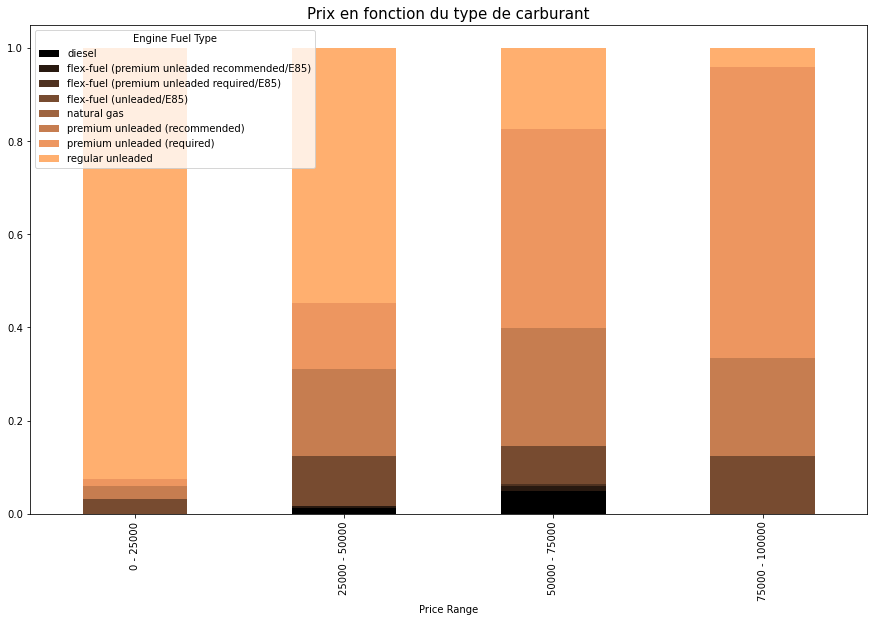

In [67]:
plt.rcParams['figure.figsize'] = (15,9)

x = pd.crosstab(data['Price Range'],data['Engine Fuel Type'])
color = plt.cm.copper(np.linspace(0,1,9))
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True ,color=color)
plt.title("Prix en fonction du type de carburant",fontweight = 21,fontsize = 15)
plt.show()

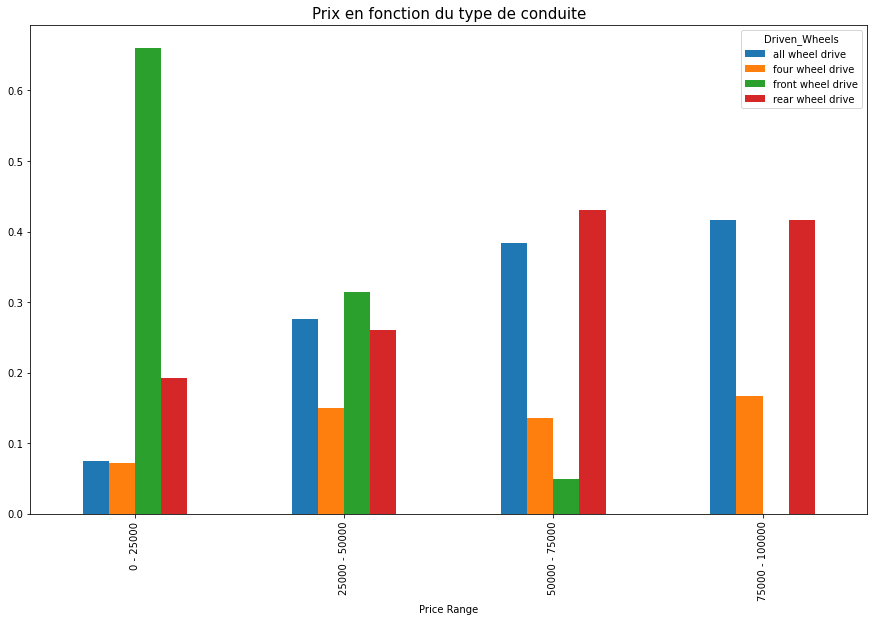

In [69]:
plt.rcParams['figure.figsize'] = (15,9)
x = pd.crosstab(data['Price Range'],data['Driven_Wheels'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = False)
plt.title('Prix en fonction du type de conduite',fontweight = 21,fontsize = 15)
plt.show()

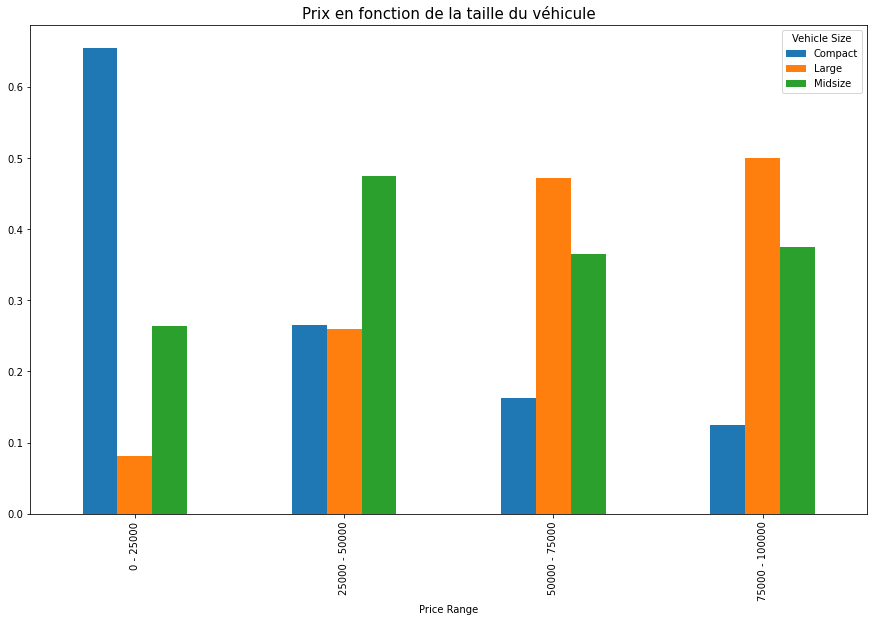

In [72]:
plt.rcParams['figure.figsize'] = (15,9)
x = pd.crosstab(data['Price Range'],data['Vehicle Size'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = False)
plt.title('Prix en fonction de la taille du véhicule',fontweight = 21,fontsize = 15)
plt.show()

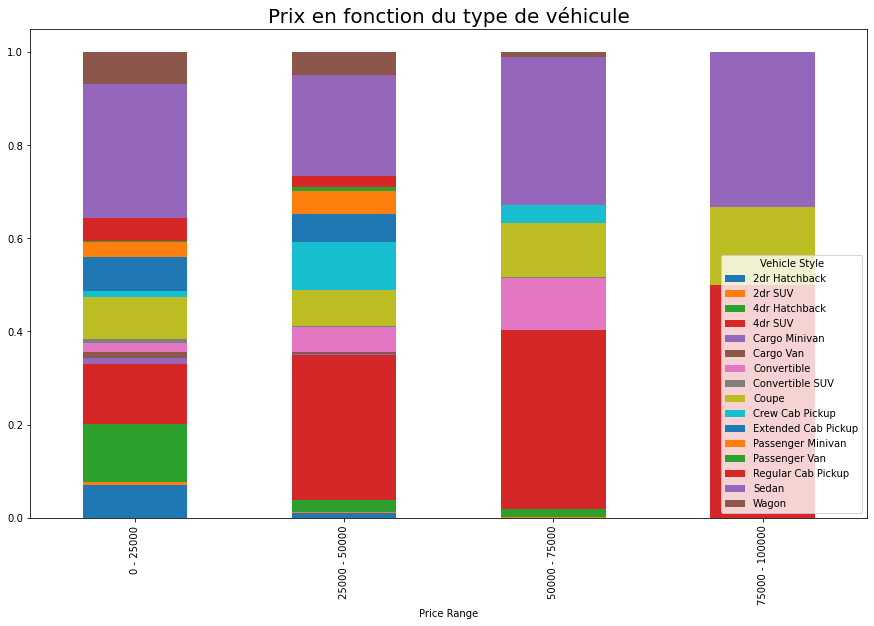

In [74]:
plt.rcParams['figure.figsize'] = (15,9)

x = pd.crosstab(data['Price Range'],data['Vehicle Style'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)
plt.title("Prix en fonction du type de véhicule",fontweight = 30,fontsize = 20)
plt.show()

In [76]:
data.shape

(8206, 16)

In [77]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Price Range
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,25000 - 50000
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,25000 - 50000
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,25000 - 50000
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,25000 - 50000
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,25000 - 50000
